In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('/content/train.csv')

In [10]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0


In [11]:
df.shape

(154229, 14)

In [12]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

EXPLORATORY DATA ANALYSIS

In [13]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
dtype: int64

In [14]:
df=df.dropna(subset='Exited')

In [15]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
df.Exited.value_counts()

0.0    121557
1.0     32671
Name: Exited, dtype: int64

In [17]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Geography']=label_encoder.fit_transform(df['Geography'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [18]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668.0,0,1,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627.0,0,1,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678.0,0,1,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581.0,0,1,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716.0,2,1,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0


In [19]:
df1=df.drop(['Surname'],axis=1)

In [20]:
df['Geography'].value_counts()

0    88119
2    33789
1    32320
Name: Geography, dtype: int64

<Axes: >

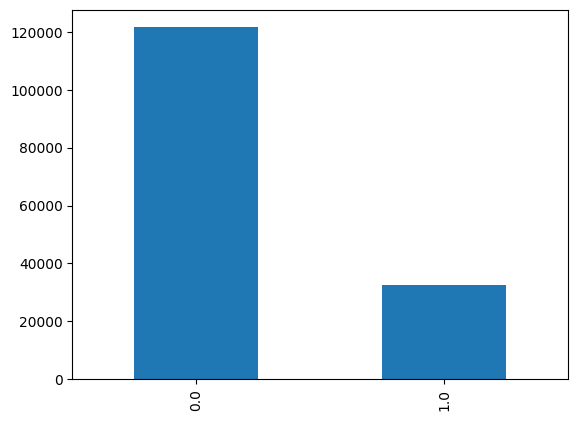

In [21]:
df['Exited'].value_counts().plot(kind='bar')

In [22]:
df1.head()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,668.0,0,1,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0
1,1,15749177,627.0,0,1,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0
2,2,15694510,678.0,0,1,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0
3,3,15741417,581.0,0,1,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0
4,4,15766172,716.0,2,1,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0


<ipython-input-23-da675c5b96b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt='.2g')


<Axes: >

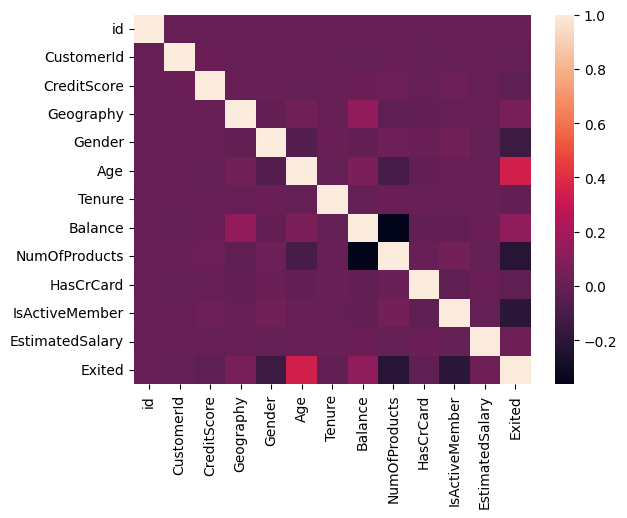

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),fmt='.2g')

**BUILDING MACHINE LEARNING MODEL**



In [24]:
x=df1.drop('Exited',axis=1)

In [25]:
y=df1['Exited']

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

**DECISION TREE**

In [27]:
y_train.value_counts()

0.0    97271
1.0    26111
Name: Exited, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dtree.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [30]:
accuracy_score(y_test,y_pred)*100

79.89366530506386

**RANDOM FOREST**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_predr=rfc.predict(x_test)
accuracy_score(y_test,y_predr)*100

86.12137716397588

**SUPPORT VECTOR MACHINE**

In [33]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [34]:
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)*100

78.73306101277313

**XG BOOST**

In [35]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred=xgb_model.predict(x_test)
accuracy_score(y_test,y_pred)*100

86.56227711858911

Visualize Random Forest and XGBoost Algorithm because Random Forest and XG Boost algorithm have the best accuracy


In [2]:
from sklearn.metrics import classification_report,confusion_matrix

Random Forest

In [38]:
y_pred=rfc.predict(x_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.88      0.95      0.92     24286\n         1.0       0.74      0.53      0.62      6560\n\n    accuracy                           0.86     30846\n   macro avg       0.81      0.74      0.77     30846\nweighted avg       0.85      0.86      0.85     30846\n'

Text(0.5, 1.0, 'Accuracy Score: 0.8656227711858911')

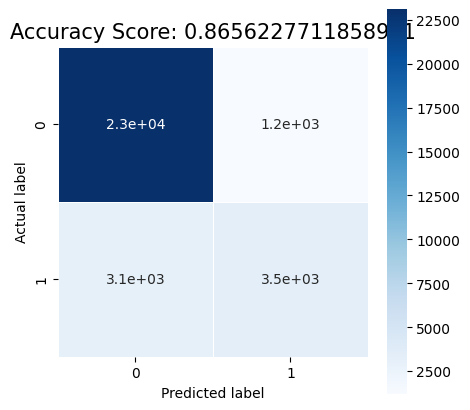

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

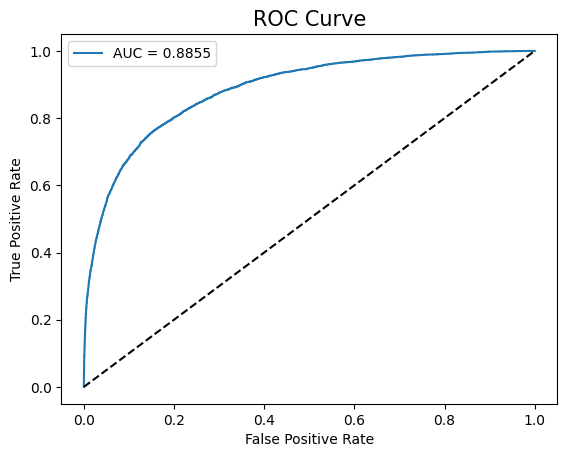

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(x_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

XG BOOST


In [45]:
y_pred = xgb_model.predict(x_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     24286
         1.0       0.74      0.56      0.64      6560

    accuracy                           0.87     30846
   macro avg       0.82      0.75      0.78     30846
weighted avg       0.86      0.87      0.86     30846



Text(0.5, 1.0, 'Accuracy Score: 0.8656227711858911')

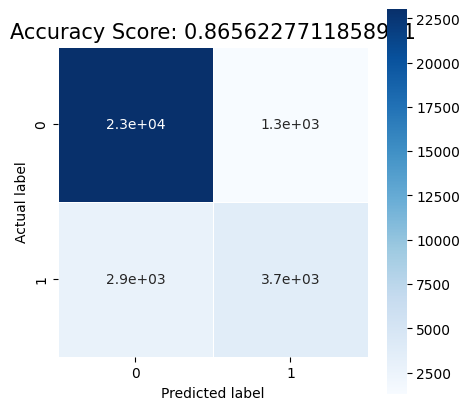

In [47]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

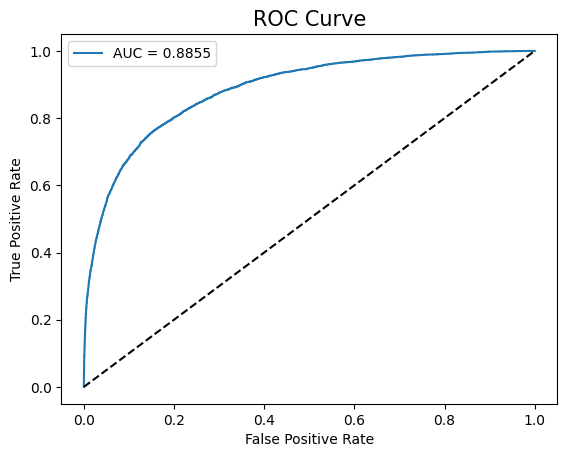

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(x_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()


CONCLUSION:

XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (86,85% and 86.45%)
